### Student Information
Name: 邱夢姿

Student ID: 108062802

GitHub ID: melissa-chiu

---

### Instructions

1. First: do the **take home** exercises in the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2020-Lab1-Master Repo](https://github.com/fhcalderon87/DM2020-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 22th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# Part 1: Take home exercises in the DM2020-Lab1-Master Repo.

### Some neccesarry cells from the Lab notebook 

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import helpers.data_mining_helpers as dmh

import pandas as pd
import numpy as np
import nltk

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline


# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [3]:
'''
    Answer here
'''

################################################################################
# method 1: access an column on a DataFrame directly as an attribute
################################################################################
print(X.category_name[0:10])


################################################################################
# method 2: query first 10 records whose category = 1 in our dataframe
################################################################################
print(X.loc[X.loc[:, 'category'] == 1, :][0:10])

0             comp.graphics
1             comp.graphics
2    soc.religion.christian
3    soc.religion.christian
4    soc.religion.christian
5    soc.religion.christian
6    soc.religion.christian
7                   sci.med
8                   sci.med
9                   sci.med
Name: category_name, dtype: object
                                                 text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics
23  From: d91-hes@tekn.hj.se (STEFAN HERMANSSON) S...         1  comp.graphics
24  From: mjw19@cl.cam.ac.uk (M.J. Williams) Subje...         1  comp.graphics
25  From: dstampe@psych.toronto.edu (Dave Stampe) ...

### >>> Exercise 5 (take home):
Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [4]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

display(NA_df)
NA_df['missing_example'].isnull()

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [5]:
'''
    Answer here
'''

#################################################################################################
# We can see that row 2,3,5 are not empty, instead they are strings with different contents.
#################################################################################################

# show the data type of each data
for i in range(len(NA_df)):
    print(type(NA_df['missing_example'][i]))

<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'NoneType'>
<class 'str'>


### >>> Exercise 6 (take home):

Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [6]:
'''
    Answer here
'''

########################################################################################################
# 1. X_sample is randomly sampling from X, and unlike X, its index is not in order (from 2009 to 160).
# 2. The minimum index and maximum index of X_sample are not necessarily equal to the one of X.
########################################################################################################

# random sampling
display(X[0:5])
X_sample = X.sample(n=1000) 
display(X_sample[0:5])

print('X')
X.info()
print()
print('X_sample')
X_sample.info()
print()

print('min index of X: {}, min index of X_sample: {}'.format(X.index.min(), X_sample.index.min()))
print('max index of X: {}, max index of X_sample: {}'.format(X.index.max(), X_sample.index.max()))

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


,text,category,category_name
1418,From: wquinnan@sdcc13.ucsd.edu (Malcusco) Subj...,3,soc.religion.christian
123,From: david@stat.com (David Dodell) Subject: H...,2,sci.med
2236,From: dkusswur@falcon.depaul.edu (Daniel C. Ku...,1,comp.graphics
2043,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
414,From: pwhite@empros.com (Peter White) Subject:...,3,soc.religion.christian


X
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2257 entries, 0 to 2256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           2257 non-null   object
 1   category       2257 non-null   int64 
 2   category_name  2257 non-null   object
dtypes: int64(1), object(2)
memory usage: 53.0+ KB

X_sample
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1418 to 1975
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           1000 non-null   object
 1   category       1000 non-null   int64 
 2   category_name  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 31.2+ KB

min index of X: 0, min index of X_sample: 2
max index of X: 2256, max index of X_sample: 2256


### >>> Exercise 8 (take home):

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com..."


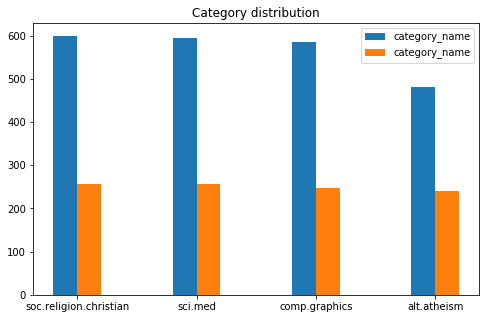

In [7]:
'''
    Answer here
'''

# obtain the unigrams for each text
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
display(X[0:5])

# to generate a document-term matrix from the original dataset
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

# plot
labels = X.category_name.value_counts().index
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
rects1 = ax.bar(x - width/2, X.category_name.value_counts(), width, label='category_name')
rects2 = ax.bar(x + width/2, X_sample.category_name.value_counts(), width, label='category_name')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

### >>> Exercise 10 (take home):

We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [8]:
display(X[0:5])
X_counts[0:5, 0:100].toarray()

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com..."


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [9]:
'''
    Answer here
'''

# Get nonero index of X_counts[0:5,0:100]
# nonzero_row is the # of the record, i.e. 4 means the 5th record
# nonzero_col is the # of the term, i.e. 0 means the 1st term
(nonzero_row, nonzero_col) = np.nonzero(X_counts[0:5,0:100].toarray())
print(nonzero_row)
print(nonzero_col)

# show the corresponding vocabulary
count_vect.get_feature_names()[nonzero_col[1]]

[4 4]
[ 0 37]


'01'

### >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

(2257, 3)


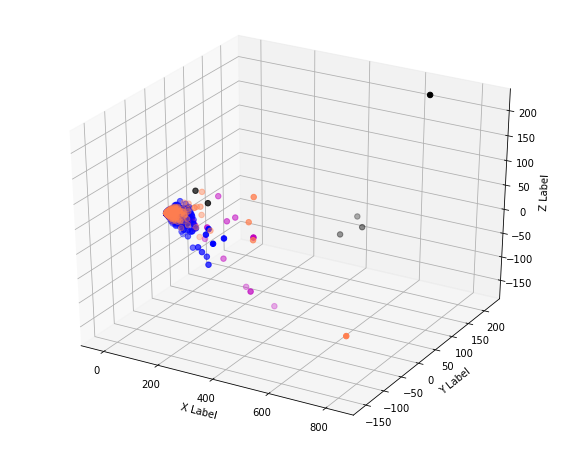

In [10]:
'''
    Answer here
'''

# PCA reduce the dimension to 3
X_reduced3 = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced3.shape)

# plot 3d with Axes3D
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced3[X['category_name'] == category].T[0]
    ys = X_reduced3[X['category_name'] == category].T[1]
    zs = X_reduced3[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c=c, s=30, marker='o', depthshade='False')
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### >>> Exercise 13 (take home):

If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [24]:
'''
    Answer here
'''

import plotly.graph_objects as go

# Form term name list and term frequencies list for the first 300 terms
term_names = np.array(['term_'+i for i in count_vect.get_feature_names()])[:300]
term_frequencies = np.asarray(X_counts.sum(axis=0))[0][:300]

# plot
fig = go.Figure(data=[go.Bar(
            x=term_names, y=term_frequencies,
            text=term_frequencies,
            textposition='auto',
        )])
fig.show()

### >>> Exercise 14 (take home):

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

In [25]:
'''
    Answer here
'''

# For the first 300 terms, only keeps the terms that its frequency is > 10
reduce_term_names = term_names[term_frequencies > 10]
reduce_term_frequencies = term_frequencies[term_frequencies > 10]

# plot
fig = go.Figure(data=[go.Bar(
            x=reduce_term_names, y=reduce_term_frequencies,
            text=reduce_term_frequencies,
            textposition='auto',
        )])
fig.show()

### >>> Exercise 15 (take home):

Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

In [27]:
'''
    Answer here
'''

# Sort the first 300 terms by descending order based on the term frequencies values
i = np.argsort(-term_frequencies)
sorted_term_names = term_names[i]
sorted_term_frequencies = term_frequencies[i]

# plot
fig = go.Figure(data=[go.Bar(
            x=sorted_term_names, y=sorted_term_frequencies,
            text=sorted_term_frequencies,
            textposition='auto',
        )])
fig.show()

### >>> Exercise 16 (take home):

Try to generate the binarization using the category_name column instead. Does it work?